In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/drive/MyDrive/cropped.zip"  # Replace with the path to your uploaded zip file

# Folder to extract the contents
output_folder = "/content/Train/cropped"  # Replace with the path to your desired output folder

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Unzip the contents of the zip file to the output folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

print("Unzipped files successfully.")


Unzipped files successfully.


In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/drive/MyDrive/Degarded.zip"  # Replace with the path to your uploaded zip file

# Folder to extract the contents
output_folder = "/content/Train/degraded"  # Replace with the path to your desired output folder

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Unzip the contents of the zip file to the output folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

print("Unzipped files successfully.")


Unzipped files successfully.


<ipython-input-4-b3d1c5073a5a>:221: UserWarning: Using a target size (torch.Size([32, 1, 1, 1])) that is different to the input size (torch.Size([32, 1, 32, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(outputs, targets_expanded)


Epoch [1/20], Step [10/1124], Loss: 655.8369


<ipython-input-4-b3d1c5073a5a>:19: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1, 32, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = F.mse_loss(pred, gt)


Epoch [1/20], Step [20/1124], Loss: 221.6940
Epoch [1/20], Step [30/1124], Loss: 147.5593
Epoch [1/20], Step [40/1124], Loss: 62.0613
Epoch [1/20], Step [50/1124], Loss: 33.6790
Epoch [1/20], Step [60/1124], Loss: 27.4712
Epoch [1/20], Step [70/1124], Loss: 12.8560
Epoch [1/20], Step [80/1124], Loss: 4.3897
Epoch [1/20], Step [90/1124], Loss: 3.4351
Epoch [1/20], Step [100/1124], Loss: 2.2471
Epoch [1/20], Step [110/1124], Loss: 2.2422
Epoch [1/20], Step [120/1124], Loss: 1.2797
Epoch [1/20], Step [130/1124], Loss: 1.0191
Epoch [1/20], Step [140/1124], Loss: 1.3083
Epoch [1/20], Step [150/1124], Loss: 0.7952
Epoch [1/20], Step [160/1124], Loss: 0.6208
Epoch [1/20], Step [170/1124], Loss: 0.6196
Epoch [1/20], Step [180/1124], Loss: 0.5473
Epoch [1/20], Step [190/1124], Loss: 0.5255
Epoch [1/20], Step [200/1124], Loss: 0.5150
Epoch [1/20], Step [210/1124], Loss: 0.5311
Epoch [1/20], Step [220/1124], Loss: 0.4666
Epoch [1/20], Step [230/1124], Loss: 0.4581
Epoch [1/20], Step [240/1124], L

<ipython-input-4-b3d1c5073a5a>:221: UserWarning: Using a target size (torch.Size([26, 1, 1, 1])) that is different to the input size (torch.Size([26, 1, 32, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(outputs, targets_expanded)


Epoch [2/20], Step [10/1124], Loss: 0.0296
Epoch [2/20], Step [20/1124], Loss: 0.0304
Epoch [2/20], Step [30/1124], Loss: 0.0322
Epoch [2/20], Step [40/1124], Loss: 0.2123
Epoch [2/20], Step [50/1124], Loss: 0.0335
Epoch [2/20], Step [60/1124], Loss: 0.0402
Epoch [2/20], Step [70/1124], Loss: 0.0421
Epoch [2/20], Step [80/1124], Loss: 0.0470
Epoch [2/20], Step [90/1124], Loss: 0.0260
Epoch [2/20], Step [100/1124], Loss: 0.5233
Epoch [2/20], Step [110/1124], Loss: 0.0522
Epoch [2/20], Step [120/1124], Loss: 0.0328
Epoch [2/20], Step [130/1124], Loss: 0.0790
Epoch [2/20], Step [140/1124], Loss: 0.0806
Epoch [2/20], Step [150/1124], Loss: 0.0656
Epoch [2/20], Step [160/1124], Loss: 0.1885
Epoch [2/20], Step [170/1124], Loss: 0.1088
Epoch [2/20], Step [180/1124], Loss: 0.0261
Epoch [2/20], Step [190/1124], Loss: 0.0401
Epoch [2/20], Step [200/1124], Loss: 0.0167
Epoch [2/20], Step [210/1124], Loss: 0.0889
Epoch [2/20], Step [220/1124], Loss: 0.0369
Epoch [2/20], Step [230/1124], Loss: 0.06

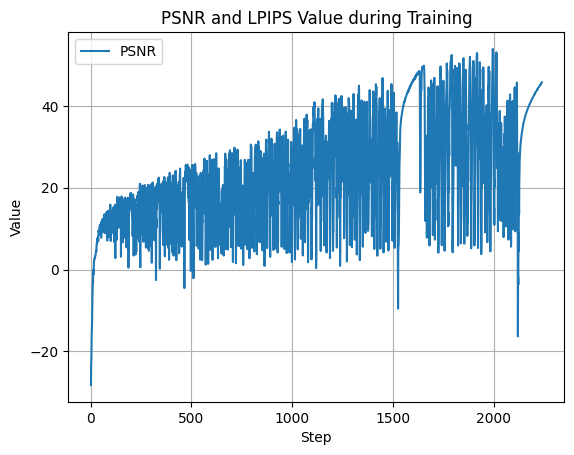

In [ ]:
# coding: utf-8

# In[16]:


import torch
import torch.nn as nn
import torch.nn.functional as F
from math import sqrt
import numpy as np
import torch.nn.init as init
import torchvision
import torchvision.transforms as transforms
import torch.nn.init as init
import matplotlib.pyplot as plt


def psnr(gt, pred):
    mse = F.mse_loss(pred, gt)
    psnr = 20 * torch.log10(1.0 / torch.sqrt(mse))
    return psnr

def xavier(param):
    init.xavier_uniform(param)


transform = transforms.Compose([
    transforms.Resize(8),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))  # Assuming you are using grayscale images
])

num_epochs = 20
batch_size = 32 # Reduce the batch size
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dataset = torchvision.datasets.ImageFolder('/content/Train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)




class SingleLayer(nn.Module):
    def __init__(self, inChannels,growthRate):
        super(SingleLayer, self).__init__()
        self.conv1 =nn.Conv2d(inChannels,growthRate,kernel_size=3,padding=1, bias=True)
        self.conv2 =nn.Conv2d(inChannels,growthRate,kernel_size=3,padding=1, bias=True)
        self.conv3 =nn.Conv2d(inChannels,growthRate,kernel_size=3,padding=1, bias=True)
        self.conv4 =nn.Conv2d(inChannels,growthRate,kernel_size=3,padding=1, bias=True)
        self.conv5 =nn.Conv2d(inChannels,growthRate,kernel_size=3,padding=1, bias=True)
        self.conv6 =nn.Conv2d(inChannels,growthRate,kernel_size=3,padding=1, bias=True)
        self.conv7 =nn.Conv2d(inChannels,growthRate,kernel_size=3,padding=1, bias=True)
        self.conv8 =nn.Conv2d(inChannels,growthRate,kernel_size=3,padding=1, bias=True)
    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = torch.cat((x, out), 1)
        return out

class Net(nn.Module):
    def __init__(self, inChannels, growthRate, nDenselayer, nBlock):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(inChannels, growthRate, kernel_size=3, padding=1, bias=True)
        inChannels = growthRate

        self.dense1 = self._make_dense(inChannels, growthRate, nDenselayer)
        inChannels += nDenselayer * growthRate

        self.transition1 = self._make_transition(inChannels, inChannels // 2)
        inChannels = inChannels // 2

        self.dense2 = self._make_dense(inChannels, growthRate, nDenselayer)
        inChannels += nDenselayer * growthRate

        self.transition2 = self._make_transition(inChannels, inChannels // 2)
        inChannels = inChannels // 2

        self.dense3 = self._make_dense(inChannels, growthRate, nDenselayer)
        inChannels += nDenselayer * growthRate

        self.transition3 = self._make_transition(inChannels, inChannels // 2)
        inChannels = inChannels // 2

        self.Bottleneck = nn.Conv2d(in_channels=inChannels, out_channels=256, kernel_size=1, padding=0, bias=True)

        self.convt1 = nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=4, stride=2, padding=1, bias=True)
        self.convt2 = nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=4, stride=2, padding=1, bias=True)
        self.conv2 = nn.Conv2d(in_channels=256, out_channels=1, kernel_size=3, padding=1, bias=True)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.xavier_uniform_(m.weight.data)
                if m.bias is not None:
                    m.bias.data.zero_()

    def _make_dense(self, inChannels, growthRate, nDenselayer):
        layers = []
        for i in range(int(nDenselayer)):
            layers.append(SingleLayer(inChannels, growthRate))
            inChannels += growthRate
        return nn.Sequential(*layers)

    def _make_transition(self, inChannels, outChannels):
        return nn.Conv2d(inChannels, outChannels, kernel_size=1, bias=True)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.dense1(out)

        out = self.transition1(out)  # Transition after first dense block
        out = F.relu(out)

        out = self.dense2(out)

        out = self.transition2(out)  # Transition after second dense block
        out = F.relu(out)

        out = self.dense3(out)

        out = self.transition3(out)  # Transition after third dense block
        out = F.relu(out)

        out = self.Bottleneck(out)
        out = self.convt1(out)
        out = self.convt2(out)

        HR = self.conv2(out)
        return HR

model = Net(3, 16, 8, 8).to(device)  # Use inChannels=3 for RGB images

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
def custom_loss(outputs, targets):
    # Expand the target data to match the output size (single-channel)
    constant_value = 32
    targets_expanded = targets.unsqueeze(1)
    targets_expanded = targets_expanded.unsqueeze(-1)
    targets_expanded.fill_(constant_value)
    targets_expanded = targets_expanded.unsqueeze(-1)
    # Fill the expanded tensor with a constant value (e.g., 42)


# Output: tensor([[[[42]]],
#                 [[[42]]],
#                 ...
#                 [[[42]]]])

    # Calculate the mean squared error
    loss = F.mse_loss(outputs, targets_expanded)

    return loss
# Training loop
psnr_values_list = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for i, (images, targets) in enumerate(train_loader):
        images = images.to(device)
        targets = targets.float().to(device)

        # Forward pass
        outputs = model(images)
        loss = custom_loss(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Clear GPU memory after each iteration
        torch.cuda.empty_cache()


        # gt_image and pred_image, respectively
        gt_image = targets  # Your ground truth image tensor
        pred_image = outputs  # Your predicted image tensor

        # Calculate PSNR
        if (i + 1) % 10 == 0:
            # lpips_value = lpips_metric_model(gt_image, pred_image).mean()
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_step}], Loss: {loss.item():.4f}')
            psnr_value = psnr(gt_image, pred_image)
            psnr_values_list.append(psnr_value.item())  # Store the PSNR value in the list
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

# Plot the PSNR and LPIPS value graphs
plt.plot(range(1, len(psnr_values_list) + 1), psnr_values_list, label='PSNR')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('PSNR and LPIPS Value during Training')
plt.grid(True)
plt.legend()

plt.show()
